<a href="https://colab.research.google.com/github/NesrineTahmi/ML-models-from-scratch/blob/main/LinearRegression/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Algorithm - From scratch using Numpy**

*In this notebook i implement linear regression algorithm from scratch, without using scikit-learn*

## 1. Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

## 2. Generating data

In [6]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
y = y.reshape(-1, 1) #easier for mathematical manipulation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Text(0.5, 1.0, 'Linear Regression Dataset')

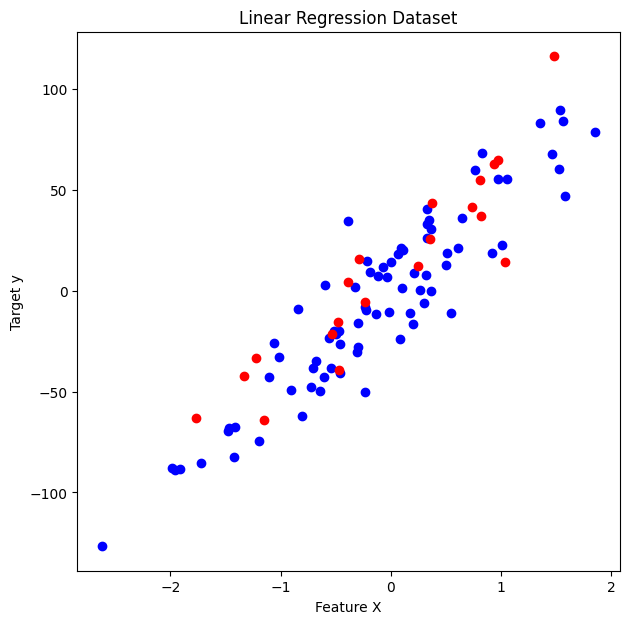

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(X_train, y_train, color='blue', label= 'Training data')
plt.scatter(X_test, y_test, color='red', label= 'Testing data')
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Linear Regression Dataset")

## 3. Linear regression implementation

In [34]:
class LinearRegression:
  def __init__(self, lr=0.01, n_iters=1000): #lr : learning rate
    self.lr = lr
    self.n_iters = n_iters
    self.weight = None
    self.bias = None
    self.cost_history = []

  def fit(self, X, y):
    nb_samples, nb_features = X.shape
    self.weight = np.zeros(nb_features)
    self.bias = 0

    y = y.flatten()

    #gradient descent
    for _ in range(self.n_iters):
      y_hat = np.dot(X, self.weight) + self.bias
      error = y_hat - y
      #computing cost
      cost = (1/(2*nb_samples)) * np.sum(error**2)
      self.cost_history.append(cost)

      dw = (1/nb_samples) * np.dot(X.T, error) #it's dJ(w,b)/dw with J(w,b) = 1/2n * sum((y_hat_i - y_i)^2)
      db = (1/nb_samples) * np.sum(error) #same as for the weight

      self.weight -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self, X):
    return np.dot(X, self.weight) + self.bias


## 4. Testing the model

In [38]:
model = LinearRegression(lr = 0.01, n_iters=1000)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

# We use .flatten() to ensure y and y_hat are 1D vectors (shape: [n,]) rather than column matrices (shape: [n, 1])

y_predicted = y_predicted.flatten()
y_test = y_test.flatten()

#evaluation metrics
mse = np.mean((y_predicted - y_test)**2)
rmse = np.sqrt(mse)

y_mean = np.mean(y_test)
ss_res = np.sum((y_predicted - y_test)**2) #sum of errors of the model
ss_tot = np.sum((y_predicted - y_mean)**2) #sum of the variances
r2 = 1 - (ss_res / ss_tot)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MSE:  417.00933221477027
RMSE:  20.420806355645468
R2 Score:  0.7751500276586761


## 5. Visualizing results

### Best Fit Line

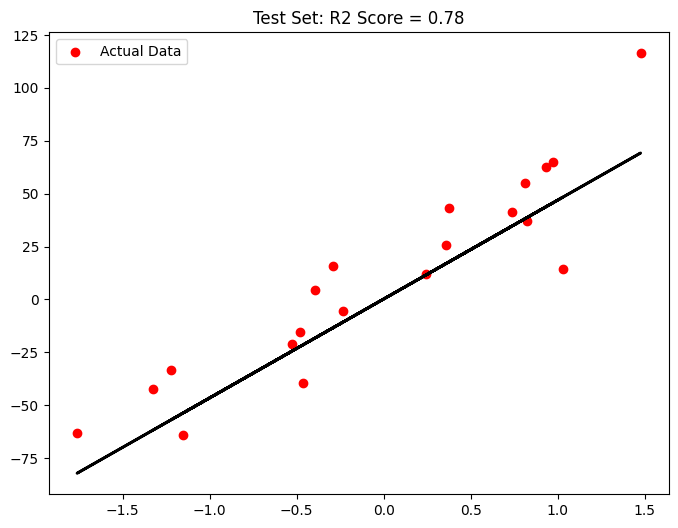

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='red', label='Actual Data')
plt.plot(X_test, y_predicted, color='black', linewidth=2)
plt.title(f"Test Set: R2 Score = {r2:.2f}")
plt.legend()
plt.show()

### Learning Curve

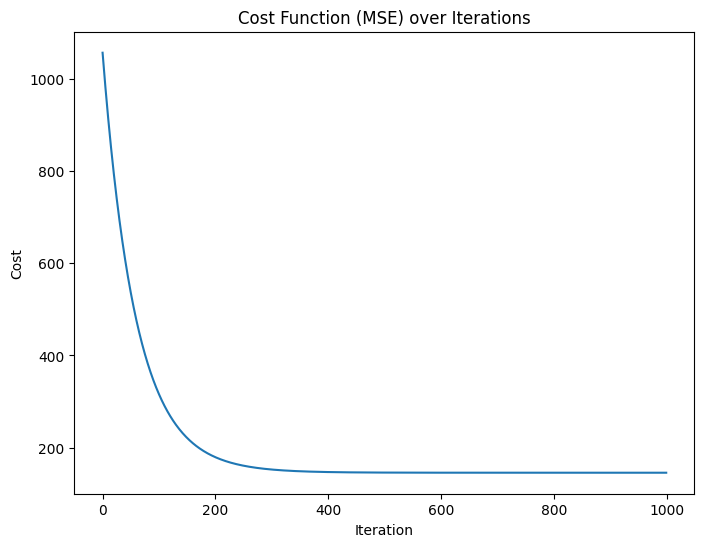

In [40]:
plt.figure(figsize=(8,6))
plt.plot(range(model.n_iters), model.cost_history)
plt.title("Cost Function (MSE) over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()